<h1 style="text-align: center;">Weather Exploratory Data Analysis</h1>

<p align="center">
    <img src="weather.jpg">
</p>


## **Introduction**  

This dataset captures key weather parameters such as temperature, humidity, wind speed, and weather conditions over time. Through **Exploratory Data Analysis (EDA)**, we can uncover trends, visualize patterns, and analyze relationships between these variables. This data is valuable for understanding weather fluctuations, identifying seasonal trends, and making data-driven insights.

## **Dataset**
This dataset contains weather data recorded on an hourly basis. It consists of 8,784 entries spanning an entire year, making it suitable for time-series analysis. The dataset includes 8 features, capturing various meteorological parameters:

1. Date/Time – Timestamp of the recorded observation.
2. Temp_C – Temperature in degrees Celsius.
3. Dew Point Temp_C – Dew point temperature in degrees Celsius.
4. Rel Hum_% – Relative humidity in percentage.
5. Wind Speed_km/h – Wind speed in kilometers per hour.
6. Visibility_km – Visibility distance in kilometers.
7. Press_kPa – Atmospheric pressure in kilopascals.
8. Weather – Description of weather conditions (e.g., Fog, Freezing Drizzle, etc.).

## **Objectives**
- Analyze historical weather data to identify trends and patterns.
- Understand the distribution and variability of key weather parameters.
- Detect correlations between variables such as temperature and humidity.
- Identify seasonal trends in weather conditions.

## **Insights**
- 💡Higher temperatures often coincide with lower humidity levels, which could be useful for forecasting.
- 💡Wind speed distributions indicate seasonal variations, which may impact outdoor activities and travel planning.
- 💡Cloud cover and precipitation patterns align with specific temperature and humidity ranges, reinforcing their interdependence.

## Importing Libraries

In [108]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

print("Libraries Imported Successfully ✔")

Libraries Imported Successfully ✔


## Reading Data

In [109]:
data = pd.read_csv("weather.csv")

In [110]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


### .shape
- It shows the total number of rows and columns.

In [111]:
data.shape

(8784, 8)

### .dtypes
- It shows the data types of each column.

In [112]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

### .unique()
- In a column, it shows all the unique values. It can be applied on single column only not on the whole DataFrame.

In [113]:
data["Weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

### .nunique()
- In t shows total number of unique values of each columns. It can be applied on single column as well as on the  whole DataFrame.

In [114]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

### .count()
- It shows total number of non-null in each column.It can be applied on single column as well as on the whole DataFrame.

In [115]:
data.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

### .value_count()
- It shows all unique valueswith their count.It can be applied on single column only.

In [116]:
data["Weather"].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

### .info()
- Provide basic information about DataFrame.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


## Exploratory Data Analysis

#### 👉🏻 Null Values

In [118]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

#### 💡 There is no null values so, no need of cleaning the data

### 👉🏻 Find all unique 'Wind Speed' values in the data.

In [119]:
data['Wind Speed_km/h'].nunique()

34

In [120]:
data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

#### 👉🏻 Find number of time when 'Weather is exactly Clear'.

In [121]:
# filtering
data[data.Weather == 'Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [122]:
# groupyby
data.groupby('Weather').get_group('Clear')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


#### 👉🏻 Find number of time when 'Wind Speed was exactly 4km/h'.

In [123]:
data[data['Wind Speed_km/h'] == 4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [124]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


#### 👉🏻 What is the mean of 'Visibility'?

In [125]:
data['Visibility_km'].mean()

27.664446721311478

#### 👉🏻 What is the standard deviation of 'Pressure' in this data?

In [126]:
data['Press_kPa'].std()

0.8440047459486483

#### 👉🏻 What is the variance of 'Relative Humidity' in this data?

In [127]:
data['Rel Hum_%'].var()

286.24855019850196

#### 👉🏻 Find all instance when 'Snow' was recorded.

In [129]:
data[data['Weather'].str.contains('Snow')].head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
50,1/3/2012 2:00,-10.5,-15.8,65,22,12.9,100.53,Snow Showers
51,1/3/2012 3:00,-11.3,-18.7,54,33,25.0,100.61,Snow Showers
53,1/3/2012 5:00,-12.9,-19.1,60,22,25.0,100.76,Snow Showers
54,1/3/2012 6:00,-13.3,-19.3,61,19,25.0,100.85,Snow Showers
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow


#### 👉🏻 Find all instance when 'Wind Speed' is above 24' and 'Visibility is 25'

In [130]:
data[(data['Wind Speed_km/h'] > 24) & (data['Visibility_km'] == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


#### 👉🏻 What is the mean value of each column against each 'Weather Condition'?

In [132]:
data.groupby("Weather").mean(numeric_only=True)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


#### 👉🏻 What is the Minimum & Maximum value of each column against 'Weather Condition'?

In [136]:
data.groupby('Weather').min()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,,
Clear,1/11/2012 1:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,1/1/2012 17:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1/23/2012 21:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",1/23/2012 20:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/17/2012 15:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",12/18/2012 21:00,0.3,-0.1,92,7,2.4,97.79
Fog,1/1/2012 0:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,1/13/2012 10:00,-9.0,-12.2,78,6,4.8,98.44


In [137]:
data.groupby('Weather').max()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,,
Clear,9/9/2012 5:00,32.8,20.4,99,33,48.3,103.63
Cloudy,9/9/2012 23:00,30.5,22.6,99,54,48.3,103.65
Drizzle,9/30/2012 3:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",9/30/2012 2:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/19/2012 18:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",12/22/2012 3:00,1.1,0.6,98,32,9.7,100.15
Fog,9/22/2012 0:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2/1/2012 5:00,-2.3,-3.3,93,26,12.9,101.02


#### 👉🏻 Show all records where Weather_Condition is Fog.

In [139]:
data[data['Weather'] == 'Fog']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,12/29/2012 4:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,12/29/2012 5:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,12/29/2012 6:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,12/29/2012 7:00,-14.8,-16.4,88,7,8.0,101.22,Fog


#### 👉🏻 Find all the instance when 'Weather is clear' or 'Visibility is above 40'.

In [140]:
data[(data['Weather'] == 'Clear') | (data['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


#### 👉🏻 Find all the instance when:    
##### a) 'Weather is Clear' and 'Relative Humidity is greater than 50'
##### Or
##### b} 'Visibility is above 40'

In [141]:
data[((data['Weather'] == 'Clear') & (data['Rel Hum_%'] > 50)) | (data['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


#### 👉🏻 What is the distribution of temperature (Temp_C)?

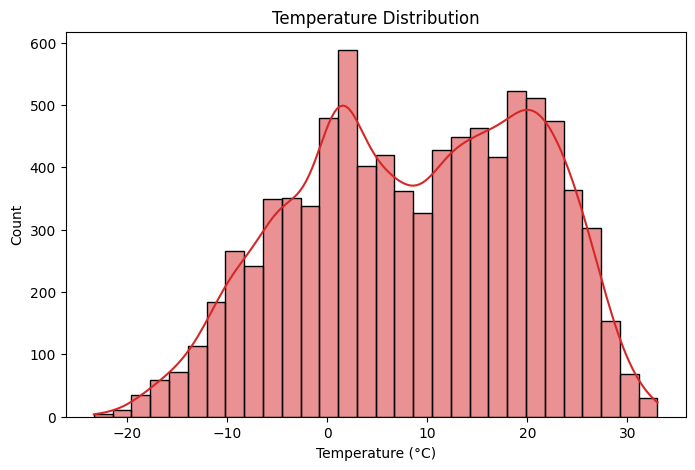

In [142]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Temp_C"], kde=True, color="tab:red", bins=30)
plt.xlabel("Temperature (°C)")
plt.title("Temperature Distribution")
plt.show()


#### 💡 The temperature distribution appears to be peaks around 0°C and 20°C, indicating two dominant temperature ranges. The spread covers a wide range from below -20°C to above 30°C, showing significant variability in temperature.

#### 👉🏻 How is wind speed 'Wind Speed_km/h' distributed?

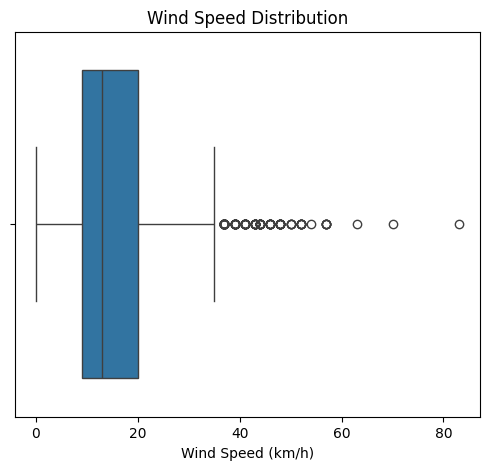

In [143]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=data["Wind Speed_km/h"], color="tab:blue")
plt.xlabel("Wind Speed (km/h)")
plt.title("Wind Speed Distribution")
plt.show()


#### 💡 The boxplot shows that wind speed is mostly concentrated in the lower range, with a median around 15-20 km/h. There are several outliers above 40 km/h, indicating occasional strong wind events.

#### 👉🏻 Is there a correlation between temperature 'Temp_C' and relative humidity (Rel Hum_%)?

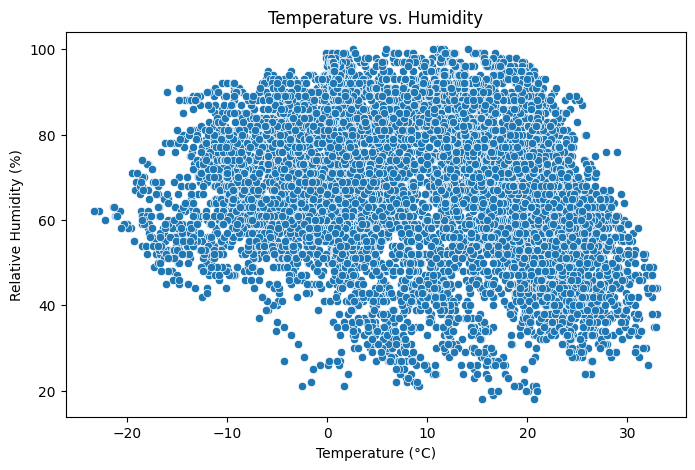

In [162]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Temp_C"], y=data["Rel Hum_%"])
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.title("Temperature vs. Humidity")
plt.show()

#### 💡 There is a negative correlation between temperature and relative humidity, as higher temperatures generally correspond to lower humidity levels. The data points are widely spread, indicating variability due to other environmental factors.

### 👉🏻 How does visibility 'Visibility_km' change with wind speed 'Wind Speed_km/h'?

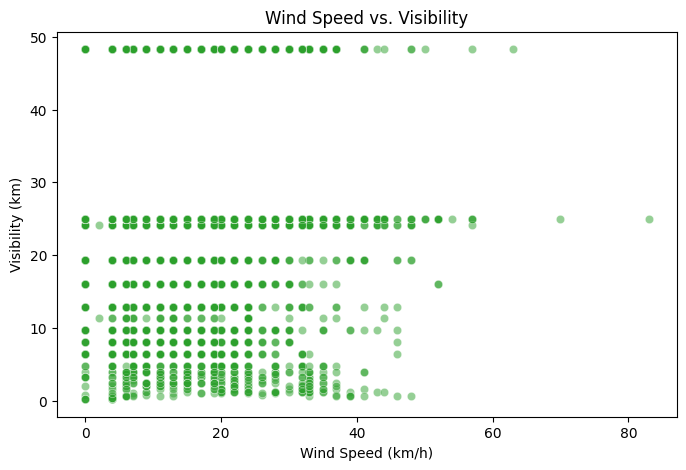

In [145]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Wind Speed_km/h"], y=data["Visibility_km"], alpha=0.5, color="tab:green")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Visibility (km)")
plt.title("Wind Speed vs. Visibility")
plt.show()


#### 💡 There is higher wind speeds tend to have more instances of lower visibility. Visibility remains clustered around specific levels, indicating other influencing factors like weather conditions.

#### 👉🏻 What are the most common weather conditions?

C:\Users\DELL\AppData\Local\Temp\ipykernel_12196\3427364952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data["Weather"], order=data["Weather"].value_counts().index, palette="viridis")


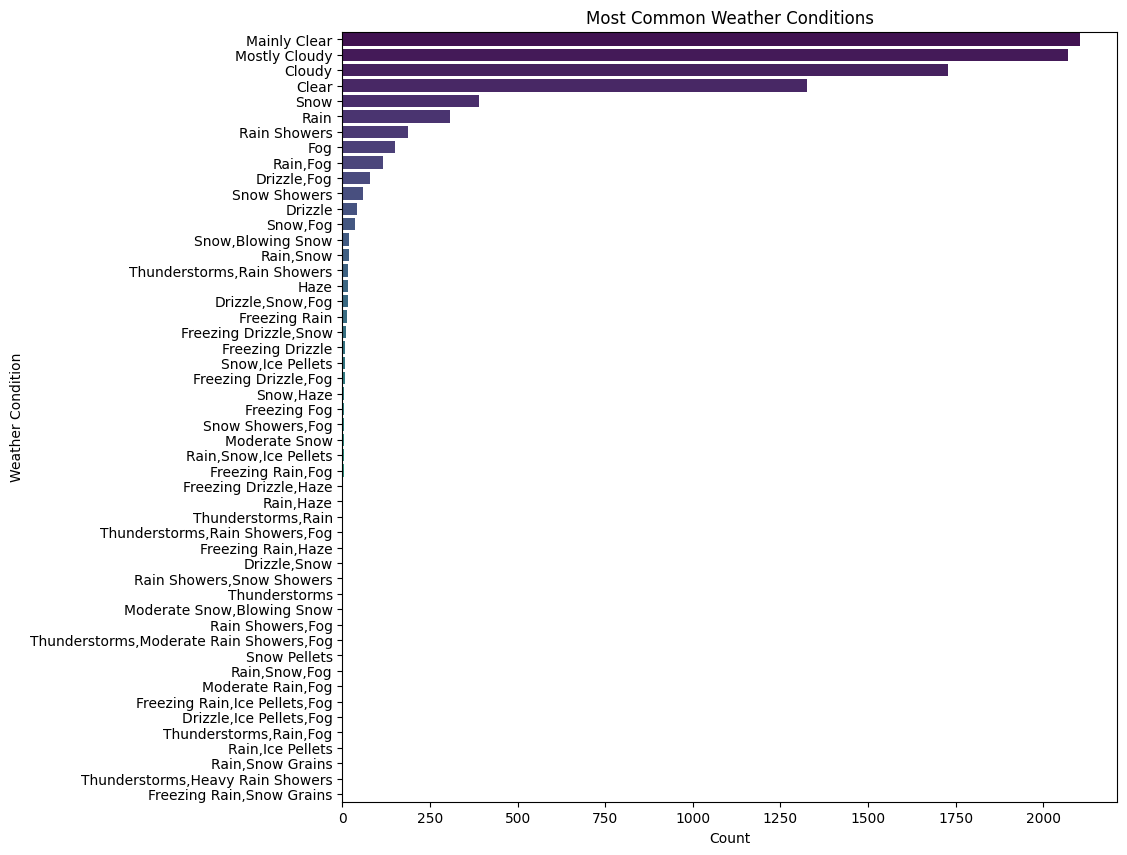

In [147]:
plt.figure(figsize=(10, 10))
sns.countplot(y=data["Weather"], order=data["Weather"].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.title("Most Common Weather Conditions")
plt.show()


#### 💡The most common weather conditions are "Mainly Clear," "Mostly Cloudy," and "Cloudy," indicating that clear and cloudy weather dominates the dataset.

#### 👉🏻 How does temperature 'Temp_C' vary across different weather conditions?

C:\Users\DELL\AppData\Local\Temp\ipykernel_12196\1017470532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weather", y="Temp_C", data=data, palette="coolwarm")


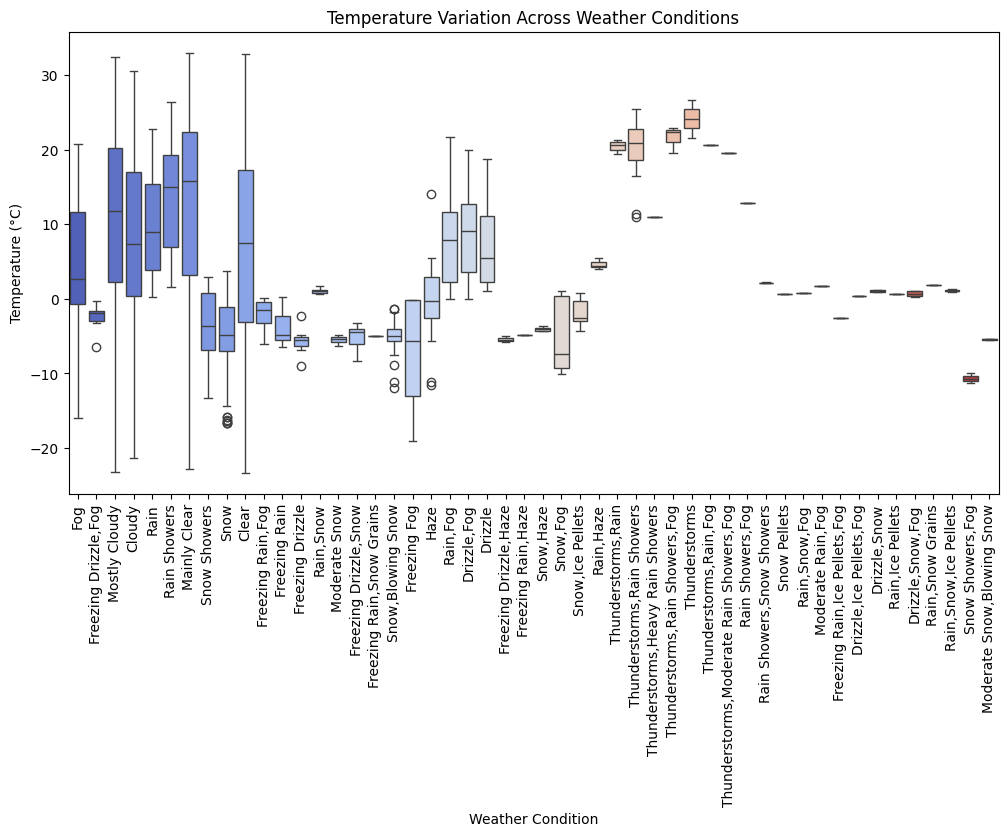

In [148]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Weather", y="Temp_C", data=data, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Weather Condition")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Variation Across Weather Conditions")
plt.show()


#### 💡 The box plot indicates that temperatures vary significantly across different weather conditions, with freezing conditions associated with lower temperatures and clear weather linked to higher temperatures. Snow and fog conditions exhibit a wider range of temperature fluctuations compared to other weather types.

#### 👉🏻 How does temperature 'Temp_C' change throughout different months?

In [149]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [150]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"])

In [151]:
data["Month"] = data["Date/Time"].dt.month


C:\Users\DELL\AppData\Local\Temp\ipykernel_12196\3176790344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Month", y="Temp_C", data=data, palette="magma")


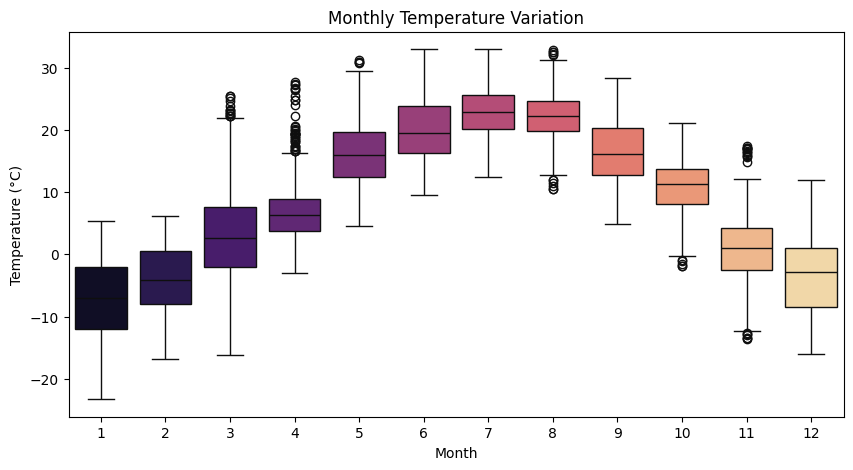

In [153]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Month", y="Temp_C", data=data, palette="magma")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Variation")
plt.show()


#### 💡 The box plot shows a clear seasonal trend, with lower temperatures in the early months (winter) and higher temperatures peaking in mid-year (summer). Temperature variability is also higher in colder months, as indicated by the wider spread of the box plots.

#### 👉🏻 How does wind speed 'Wind Speed_km/h' vary at different times of the day?

In [155]:
data["Hour"] = data["Date/Time"].dt.hour

In [156]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month,Hour
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,2
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,3
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,4


C:\Users\DELL\AppData\Local\Temp\ipykernel_12196\1028992110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Hour", y="Wind Speed_km/h", data=data, palette="plasma")


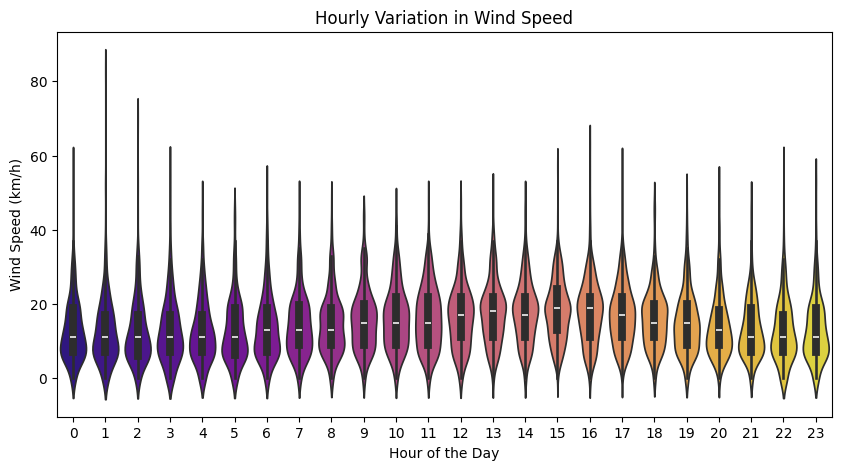

In [157]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="Hour", y="Wind Speed_km/h", data=data, palette="plasma")
plt.xlabel("Hour of the Day")
plt.ylabel("Wind Speed (km/h)")
plt.title("Hourly Variation in Wind Speed")
plt.show()


#### 💡 The violin plot indicates that wind speed varies throughout the day, with higher variability observed during afternoon and evening hours. Wind speeds tend to be lower and more consistent during early morning hours.

#### 👉🏻  How can we visualize the frequency of different wind speed values?

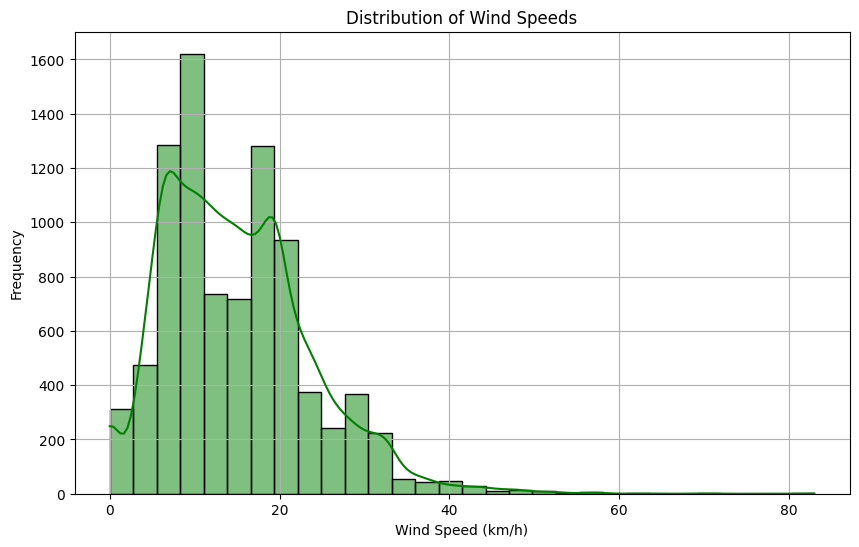

In [158]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Wind Speed_km/h"], bins=30, kde=True, color="green")

# Customize the chart
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.title("Distribution of Wind Speeds")
plt.grid(True)
plt.show()

#### 💡 The histogram shows that most wind speeds fall between **0 and 20 km/h**, with a peak around **10 km/h**, indicating that lower wind speeds are more common. The distribution is right-skewed, suggesting that higher wind speeds are relatively rare.

#### 👉🏻 How can we visually represent the most common weather conditions using a Word Cloud?

In [160]:
# Combine all text from the 'Weather' column
weather_text = " ".join(data["Weather"].dropna())

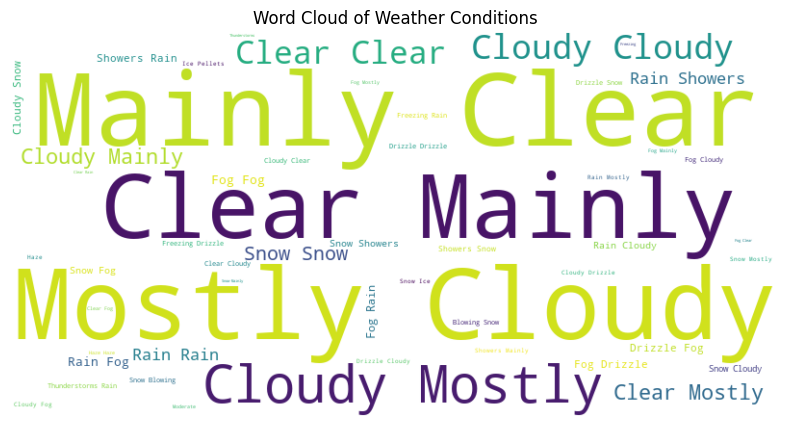

In [161]:
# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(weather_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes 
plt.title("Word Cloud of Weather Conditions")
plt.show()

#### 💡 The word cloud highlights the most frequently occurring weather conditions, like "Clear," "Cloudy," and "Mostly" appearing frequently. This suggests that clear and cloudy conditions are the most common in the dataset, while other weather conditions occur less frequently.

## **Conclusion**
The exploratory analysis of weather data provides meaningful insights into temperature fluctuations, humidity variations, and overall weather conditions. The findings highlight seasonal dependencies and correlations in weather forecasting. Future work can involve predictive modeling to enhance the accuracy of weather predictions and support data-driven decision-making.

<h2 style="text-align: center;">Thank You!</h2>